# Problem Set 1: Rate Laws

## Part A: Plotting data and determining the order of a rate law

### A1: First order rate laws
### Reaction in question: $A \rightarrow X$
### with first order rate law: $-\frac{d[A]}{dt} = k[A]$

### a)
#### Making a plot of $[A](t)$  vs.  $t$

In [2]:
import numpy as np
import matplotlib.pyplot as plt

In [3]:
def first_rate_law(A0, k, t=np.linspace(0, 10, 100), error=0.01):
    c_A = A0*np.exp(-k*t) #concentration of A (solution to the first order rate law)
    
    #lets find the half-life
    #analytical
    time_analytic = np.log(2) / k
    
    #numerical 
    for time in t:
        c_A_time = A0*np.exp(-k*time)
        if ((A0/2)-error) < c_A_time <= ((A0/2)+error): #we need to make a margin for error
            time_numeric = time
            c_A_numeric = c_A_time
            break
    if 'c_A_numeric' not in locals():
        print("Could not find solution. Consider increasing your")
        print("margin for error or increasing num component in t.")
        return
    
    #plotting
    title = "k = " + str(k)
    plt.scatter(time, c_A_numeric, c="red")
    plt.scatter(time_analytic, A0/2, c="green")
    plt.text(time, c_A_time, "numeric", fontsize=10, ha='left', va='bottom')
    plt.text(time_analytic, A0/2, "analytical", fontsize=10, ha='left', va='top')        
    plt.plot(t, c_A); plt.title(title); plt.xlabel("$time(s)$"); plt.ylabel("$[A]$")
    plt.show()
    return

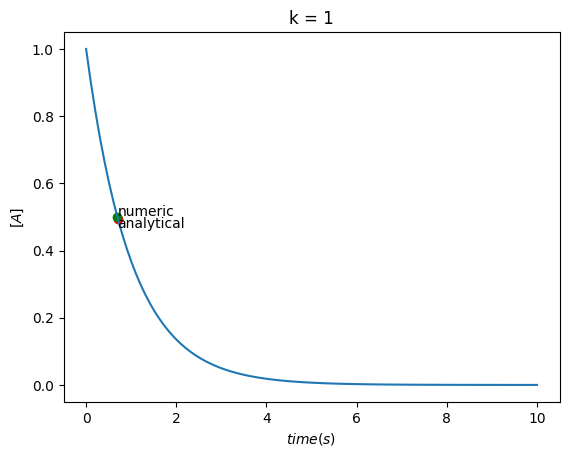

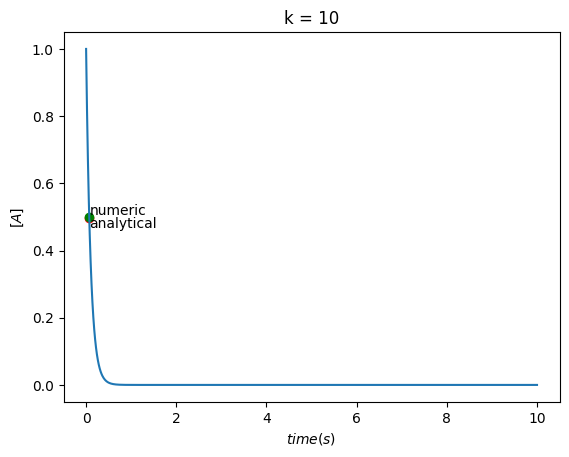

In [4]:
#constants
A0=1
k=[1, 10]
first_rate_law(A0, k[0]); first_rate_law(A0, k[1], np.linspace(0,10,1000))

##### From these graphs, it seems that the expression provided for half-life is consistent with the numerical values.

### b)

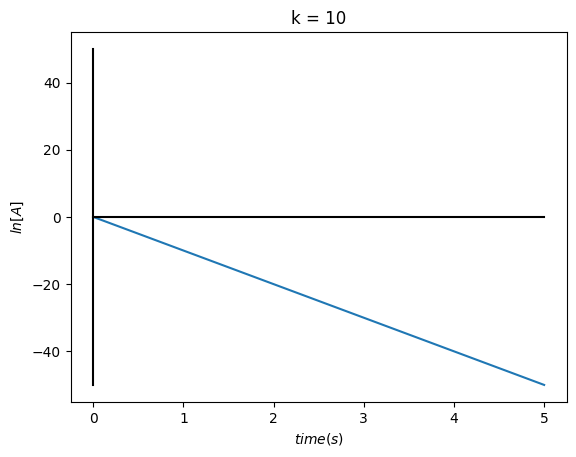

In [5]:
#constants
k=10
A0=1

#plot values
y_axis=np.linspace(-50,50)
range= [0]*50
t = np.linspace(0, 5, num=1000)
log_c_A = -(k*t) + np.log(A0)
x_axis = t*0

#plotting
plt.plot(t, log_c_A)
plt.plot(t, x_axis, c="black")
plt.plot(range, y_axis, c="black")
plt.title("k = 10"); plt.xlabel("$time(s)$"); plt.ylabel("$ln[A]$"); plt.show()

##### Here we see that the slope of this function is the negative of our k-value. The y-intercept is influenced by the $A_0$ value. At $A_0$ = 1, the line passes through the origin. At $A_0$ < 1 the y-intercept is negative and opposite is true for $A_0$ > 1.   

## A2: Second order rate laws
### $2A \rightarrow X$
### $-\frac{d[A]}{dt}=k[A]^2$
### a) and b)

0.25925925925925924
5.714285714285714


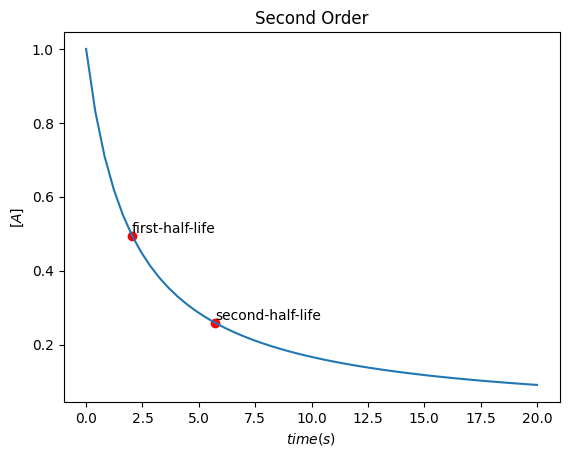

In [6]:
#constants
A0=1
k=0.5

t = np.linspace(0,20)
c_A = (A0)/((k*t*A0)+1)

#numerical
#first half-life
for time in t:
    c_A_time = (A0)/((k*time*A0)+1)
    if ((A0/2)-0.01) < c_A_time <= ((A0/2)+0.01): #we need to make a margin for error
        first_half_life = time
        first_c_A_half = c_A_time
        break

#second half-life
for time in t:
    c_A_time = (A0)/((k*time*A0)+1)
    if ((A0/4)-0.01) < c_A_time <= ((A0/4)+0.01): #we need to make a margin for error
        second_half_life = time
        second_c_A_half = c_A_time
        print(second_c_A_half)
        print(second_half_life)
        break

plt.scatter(first_half_life, first_c_A_half, c="red")
plt.text(first_half_life, first_c_A_half, "first-half-life", fontsize=10, ha='left', va='bottom')
plt.scatter(second_half_life, second_c_A_half, c="red")
plt.text(second_half_life, second_c_A_half, "second-half-life", fontsize=10, ha='left', va='bottom')
plt.plot(t, c_A); plt.title("Second Order"); plt.xlabel("$time(s)$"); plt.ylabel("$[A]$")
plt.show()

#### Ask Sung about this question

### c)

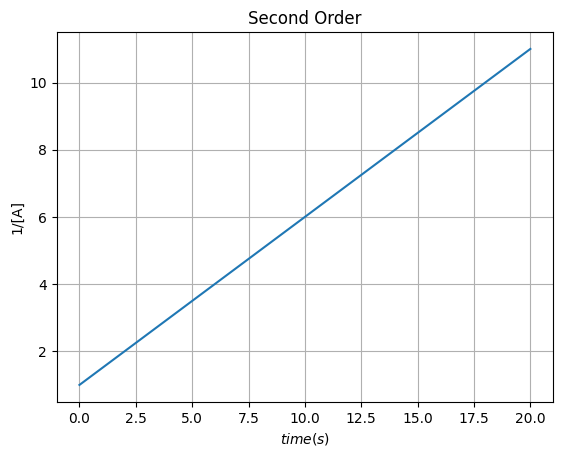

In [69]:
#constants
A0=1
k=0.5

t = np.linspace(0,20)
c_A = (A0)/((k*t*A0)+1)

plt.plot(t, 1/c_A); plt.title("Second Order"); plt.xlabel("$time(s)$"); plt.ylabel("1/[A]")
plt.grid()
plt.show()


#### As k has a direct relationship with the slope. When A0 equals zero, the function ceases to exist. A0 increases as you approach zero from the positive side and increases when you move away from zero on the negative side.

### d)

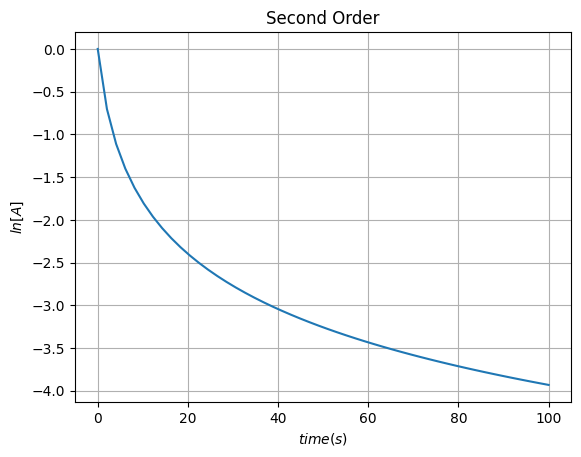

In [62]:
#constants
A0=1
k=0.5

t = np.linspace(0,100)
c_A = (A0)/((k*t*A0)+1)

plt.plot(t, np.log(c_A)); plt.title("Second Order"); plt.xlabel("$time(s)$"); plt.ylabel("$ln[A]$")
plt.grid()
plt.show()

#### The function looks like a negative exponential raised to the negative x.

## A3: Determining the rate law order from measured data